In [84]:
import pandas as pd

In [105]:
file_path = "/Users/der-bear/Downloads/train.csv"
df = pd.read_csv(file_path)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [106]:
print(df['Exited'].value_counts())

Exited
0    130113
1     34921
Name: count, dtype: int64


In [107]:
new_df = df.drop(columns = ['id', 'CustomerId', 'Surname'])
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [108]:
num_rows = new_df.shape[0]
num_features = new_df.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of features: {num_features}")

Number of rows: 165034
Number of features: 11


In [109]:
new_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [89]:
new_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [90]:
new_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [91]:
summary = []

for col in new_df.columns:
    if pd.api.types.is_numeric_dtype(new_df[col]):
        feature_type = "Numerical"
        
        q1 = df[col].quantile(0.25) 
        q3 = df[col].quantile(0.75) 
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = new_df[col][(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
        has_outliers = len(outliers) > 0
        
        values_range = f"{new_df[col].min()} to {new_df[col].max()}"
    else:
        feature_type = "Categorical"
        has_outliers = "N/A"
        values_range = new_df[col].unique() 
    
    summary.append({
        "Feature": col,
        "Type": feature_type,
        "Values/Range": values_range,
        "Has Outliers": has_outliers
    })

summary_table = pd.DataFrame(summary)

print(summary_table)

            Feature         Type              Values/Range Has Outliers
0       CreditScore    Numerical                350 to 850         True
1         Geography  Categorical  [France, Spain, Germany]          N/A
2            Gender  Categorical            [Male, Female]          N/A
3               Age    Numerical              18.0 to 92.0         True
4            Tenure    Numerical                   0 to 10        False
5           Balance    Numerical          0.0 to 250898.09        False
6     NumOfProducts    Numerical                    1 to 4         True
7         HasCrCard    Numerical                0.0 to 1.0         True
8    IsActiveMember    Numerical                0.0 to 1.0        False
9   EstimatedSalary    Numerical        11.58 to 199992.48        False
10           Exited    Numerical                    0 to 1         True


In [92]:
outlier_counts = {}

for col in new_df.columns:
    if pd.api.types.is_numeric_dtype(new_df[col]):
        q1 = new_df[col].quantile(0.25)
        q3 = new_df[col].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        num_outliers = ((new_df[col] < lower_bound) | (new_df[col] > upper_bound)).sum()
        outlier_counts[col] = num_outliers

outlier_summary = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
print(outlier_summary)

           Feature  Outlier Count
0      CreditScore            253
1              Age           6394
2           Tenure              0
3          Balance              0
4    NumOfProducts            475
5        HasCrCard          40606
6   IsActiveMember              0
7  EstimatedSalary              0
8           Exited          34921


In [93]:
column_counts = ['Geography', 'Gender', 'Age']
for col in column_counts:
    print(new_df[col].value_counts())

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
Gender
Male      93150
Female    71884
Name: count, dtype: int64
Age
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64


In [94]:
pip install seaborn


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Exited
0    130113
1     34921
Name: count, dtype: int64


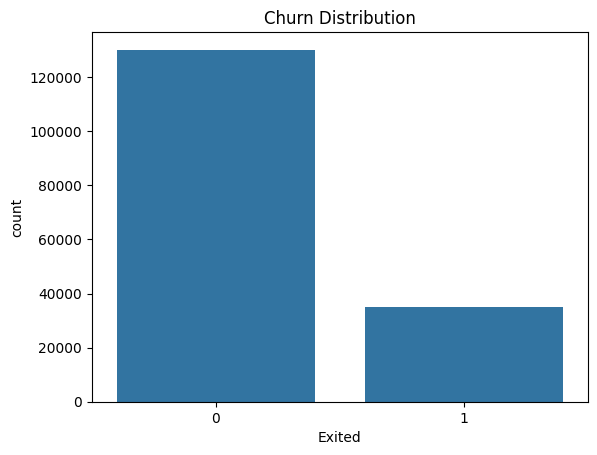

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['Exited'].value_counts())

sns.countplot(x='Exited', data=new_df)
plt.title('Churn Distribution')
plt.show()

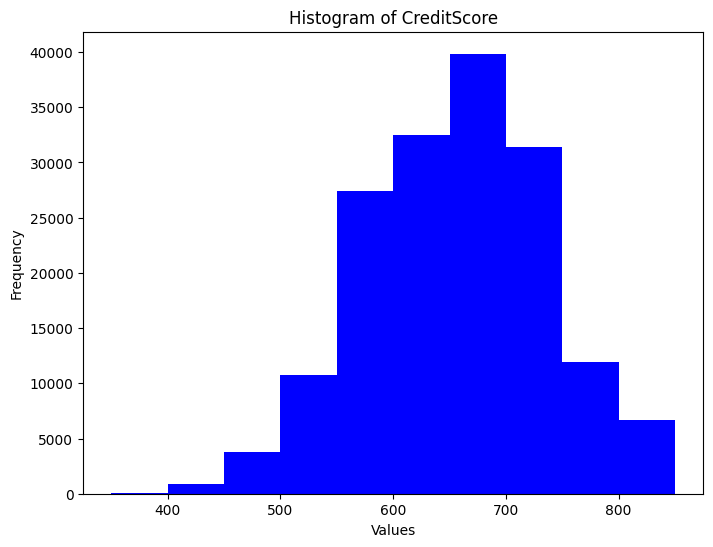

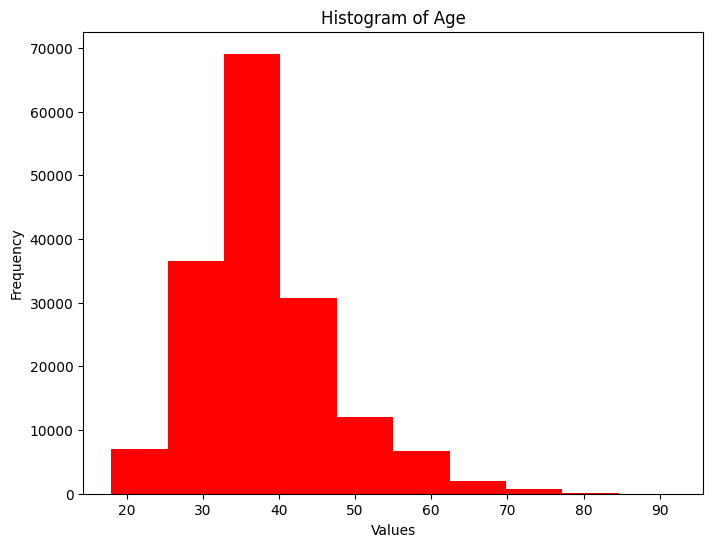

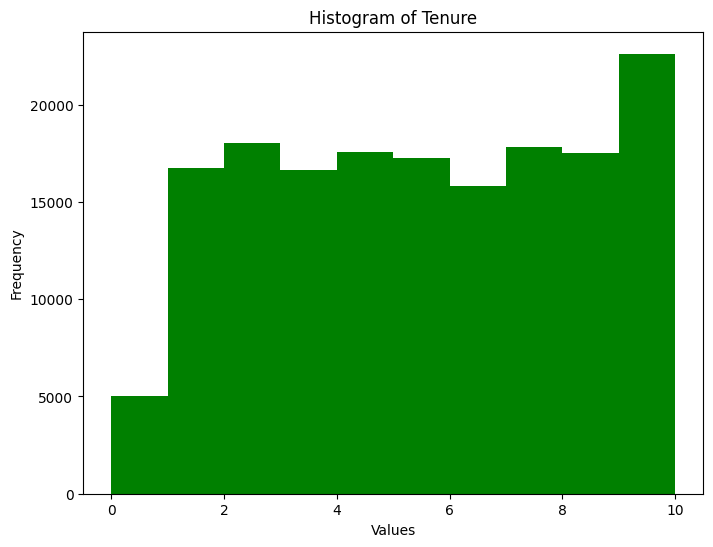

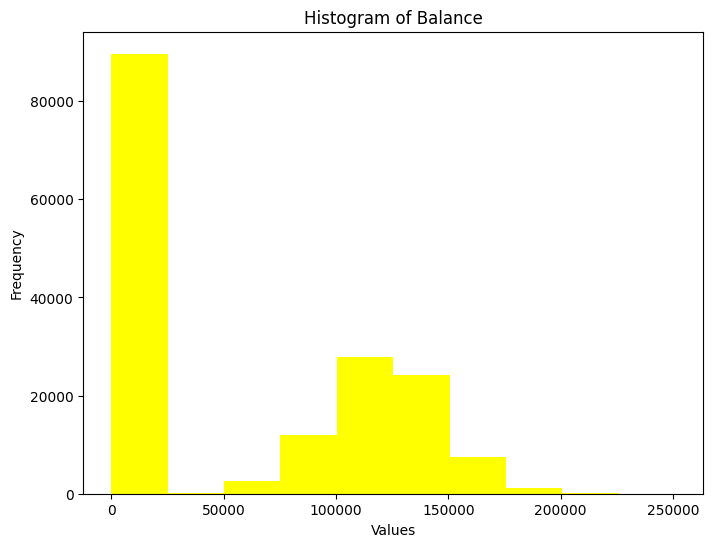

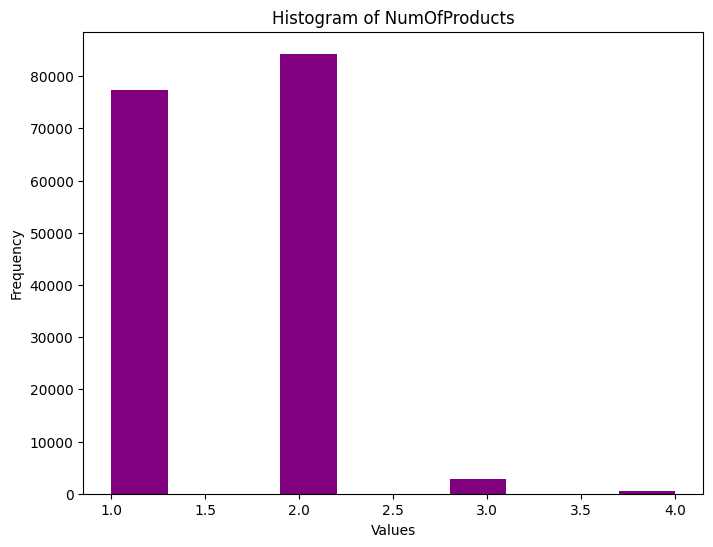

In [96]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts']

colors = ['blue', 'red', 'green', 'yellow', 'purple']

for column, color in zip(numerical_columns, colors):
    plt.figure(figsize=(8, 6))
    plt.hist(new_df[column], color=color)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

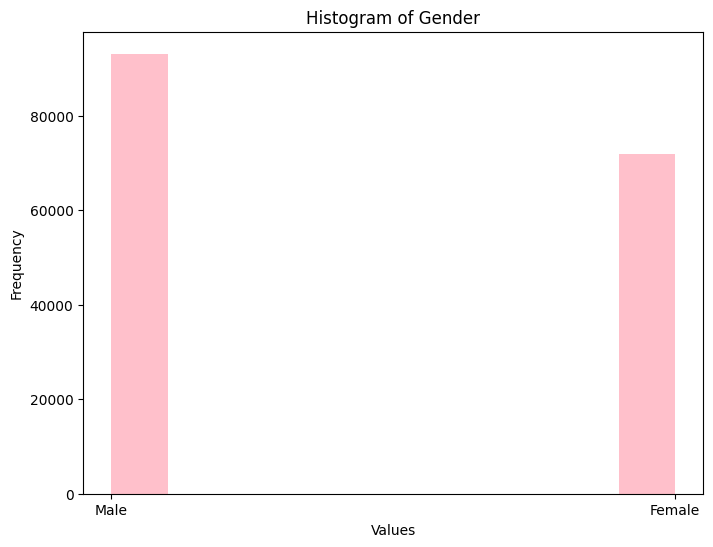

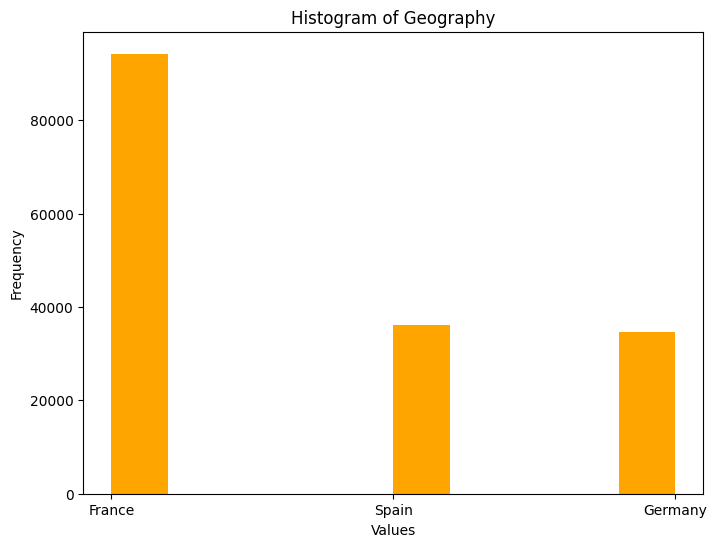

In [49]:
categorical_columns = ["Gender", "Geography"]

colors = ['pink', 'orange']

for column, color in zip(categorical_columns, colors):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], color=color)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

               CreditScore       Age    Tenure   Balance  NumOfProducts
CreditScore       1.000000 -0.008918  0.000942  0.006973       0.011361
Age              -0.008918  1.000000 -0.010830  0.064318      -0.102195
Tenure            0.000942 -0.010830  1.000000 -0.009481       0.007335
Balance           0.006973  0.064318 -0.009481  1.000000      -0.361033
NumOfProducts     0.011361 -0.102195  0.007335 -0.361033       1.000000


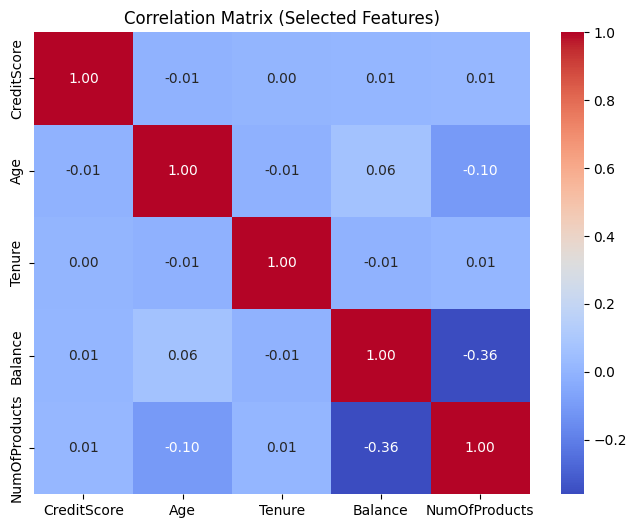

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts"] 

correlation_matrix = new_df[selected_features].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Selected Features)")
plt.show()


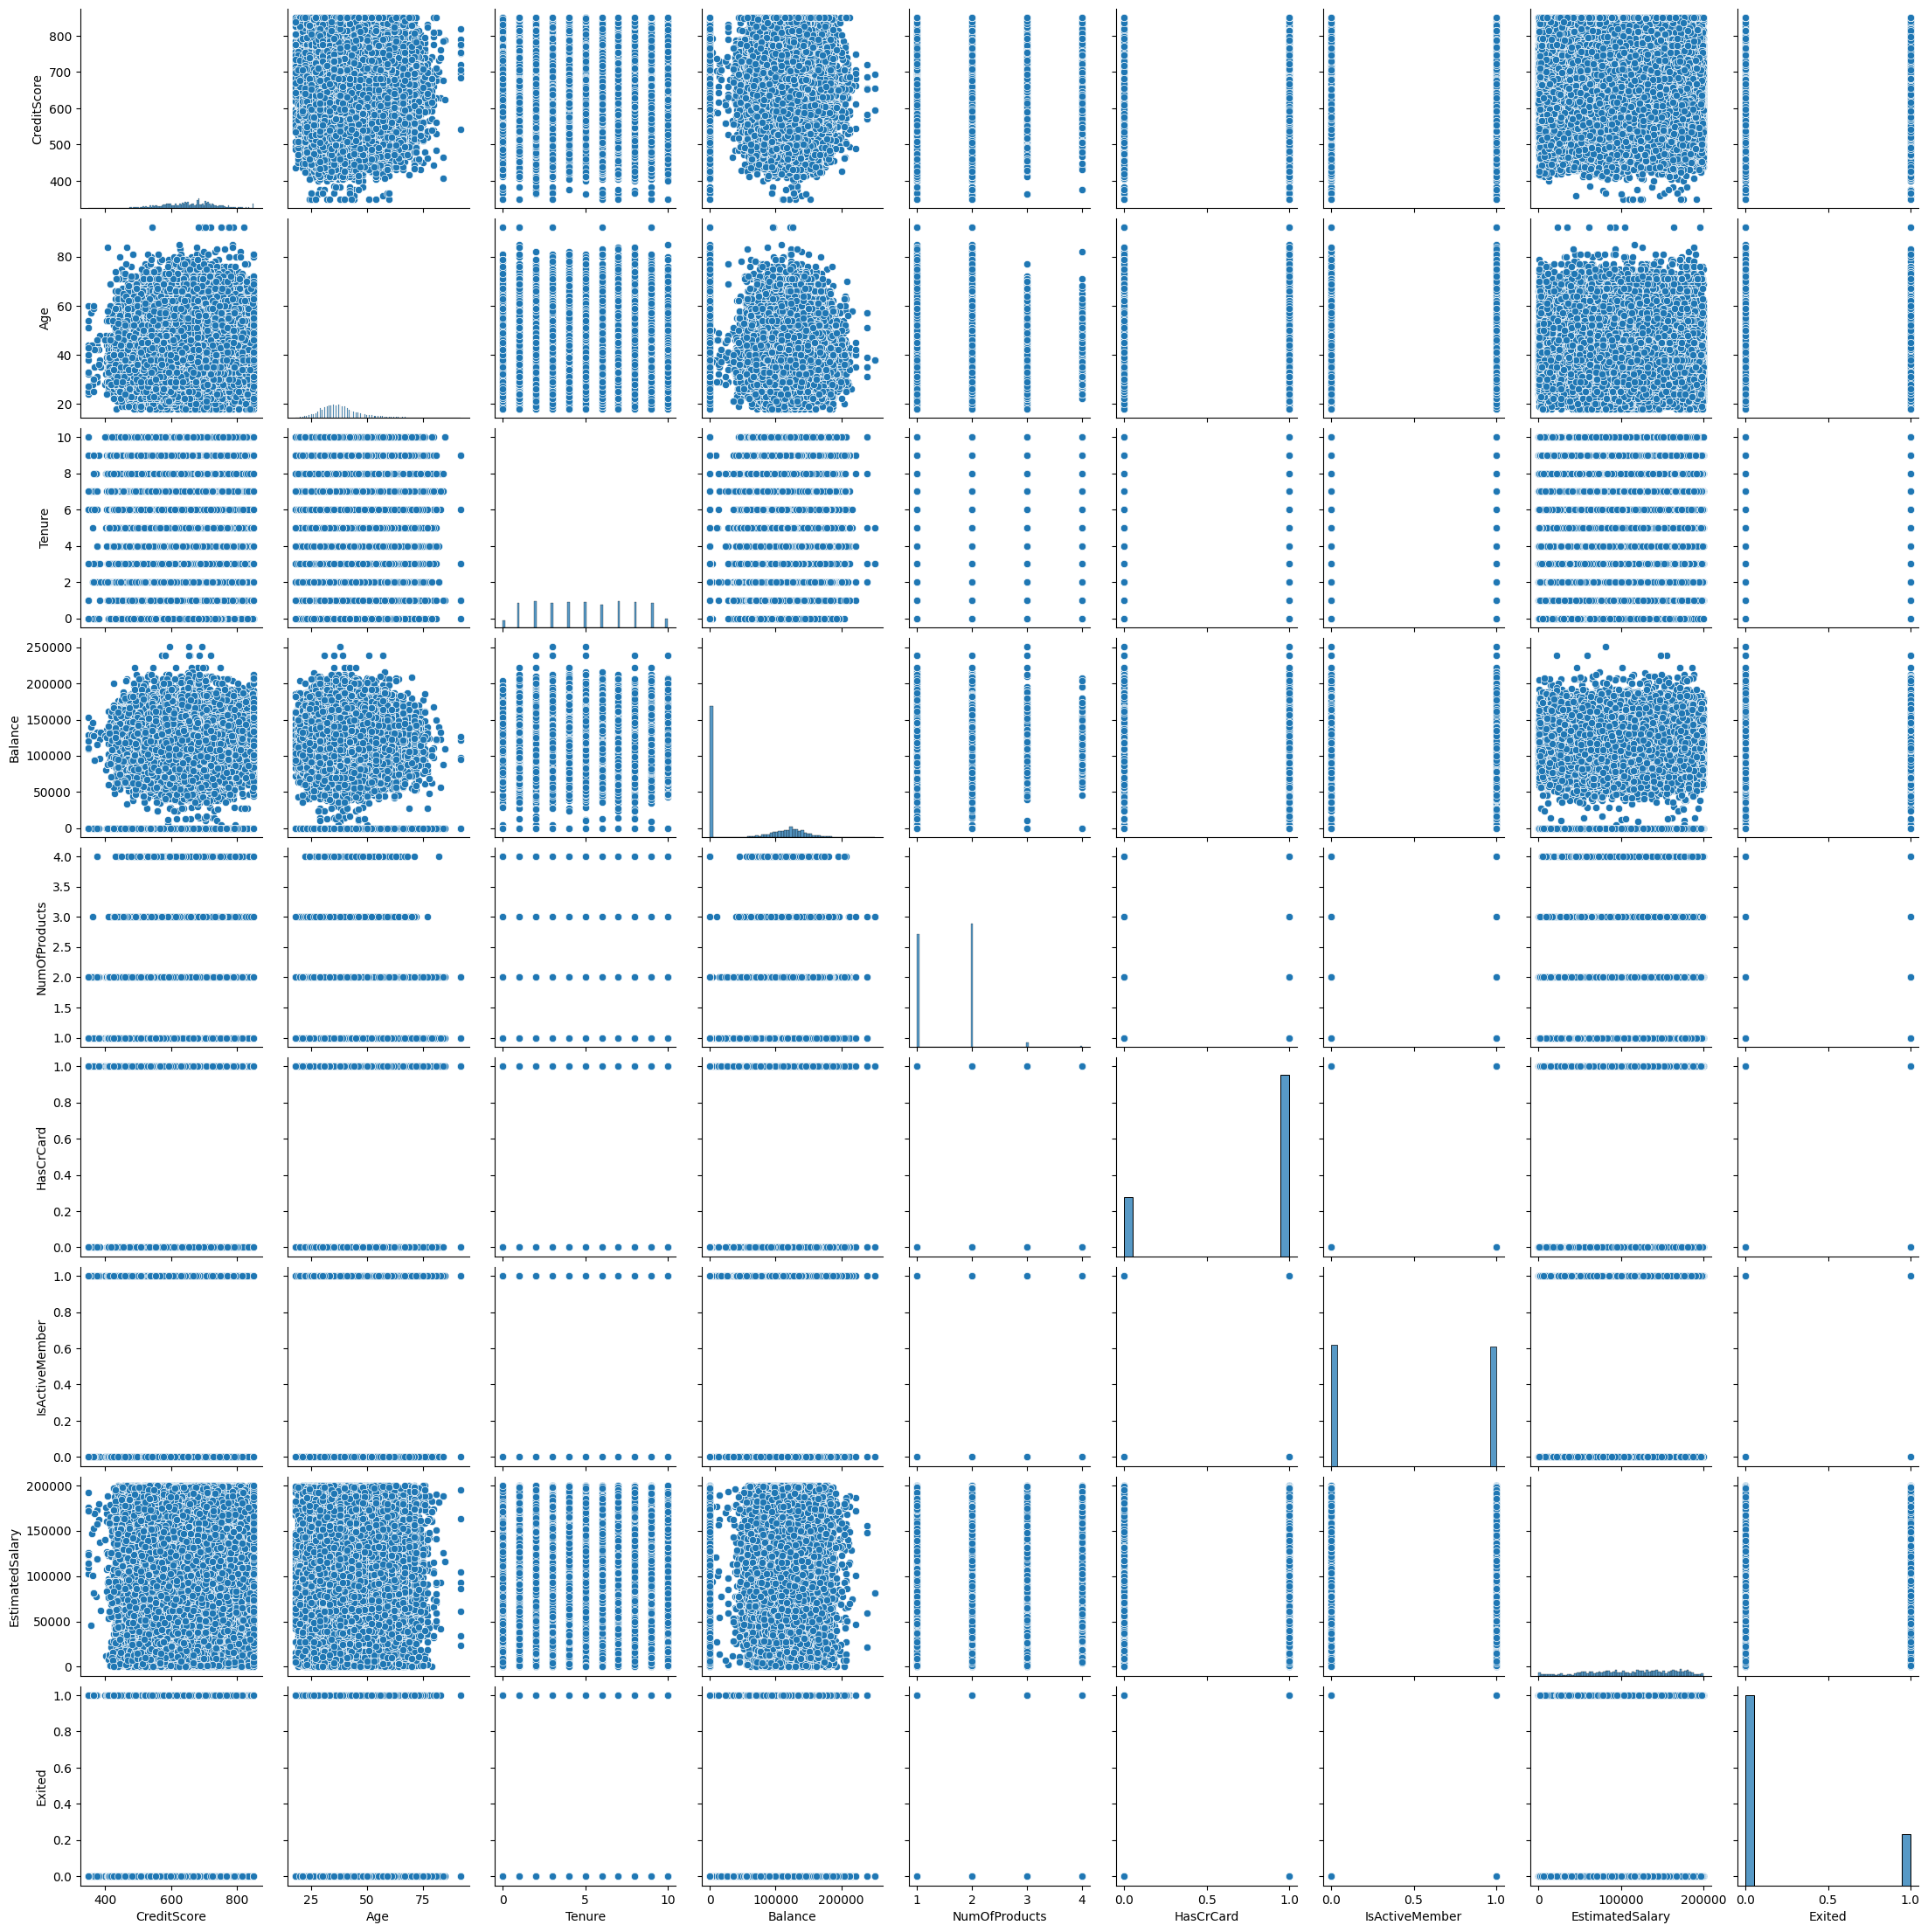

In [51]:
sns.pairplot(new_df)
plt.show()

In [110]:
df_encoded = pd.get_dummies(new_df, columns=['Gender', 'Geography'])
print(df_encoded)

        CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0               668  33.0       3       0.00              2        1.0   
1               627  33.0       1       0.00              2        1.0   
2               678  40.0      10       0.00              2        1.0   
3               581  34.0       2  148882.54              1        1.0   
4               716  33.0       5       0.00              2        1.0   
...             ...   ...     ...        ...            ...        ...   
165029          667  33.0       2       0.00              1        1.0   
165030          792  35.0       3       0.00              1        0.0   
165031          565  31.0       5       0.00              1        1.0   
165032          554  30.0       7  161533.00              1        0.0   
165033          850  31.0       1       0.00              1        1.0   

        IsActiveMember  EstimatedSalary  Exited  Gender_Female  Gender_Male  \
0                  0.0        18

In [111]:
X = df_encoded.drop(columns=['Exited'])  
y = df_encoded['Exited']             

print(X.head())
print(y.head())


   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668  33.0       3       0.00              2        1.0   
1          627  33.0       1       0.00              2        1.0   
2          678  40.0      10       0.00              2        1.0   
3          581  34.0       2  148882.54              1        1.0   
4          716  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
0             0.0        181449.97          False         True   
1             1.0         49503.50          False         True   
2             0.0        184866.69          False         True   
3             1.0         84560.88          False         True   
4             1.0         15068.83          False         True   

   Geography_France  Geography_Germany  Geography_Spain  
0              True              False            False  
1              True              False            False  
2             

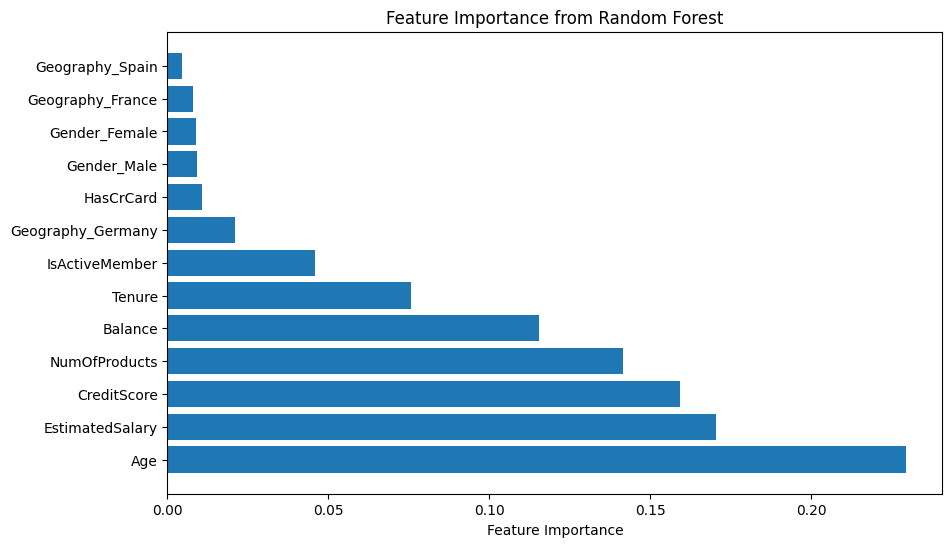

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestClassifier(random_state=42) 

model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


In [55]:
print(new_df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = new_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Exited']
new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])
scaled_df = new_df

print(scaled_df.head())
print(scaled_df['Exited'].value_counts())

   CreditScore Geography Gender       Age  Tenure   Balance  NumOfProducts  \
0        0.636    France   Male  0.202703     0.3  0.000000       0.333333   
1        0.554    France   Male  0.202703     0.1  0.000000       0.333333   
2        0.656    France   Male  0.297297     1.0  0.000000       0.333333   
3        0.462    France   Male  0.216216     0.2  0.593398       0.000000   
4        0.732     Spain   Male  0.202703     0.5  0.000000       0.333333   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             0.0         0.907279       0  
1        1.0             1.0         0.247483       0  
2        1.0             0.0         0.924364       0  
3        1.0             1.0         0.422787       0  
4        1.0             1.0         0.075293       0  
Exited
0    130113
1     34921
Name: count, dtype: int64


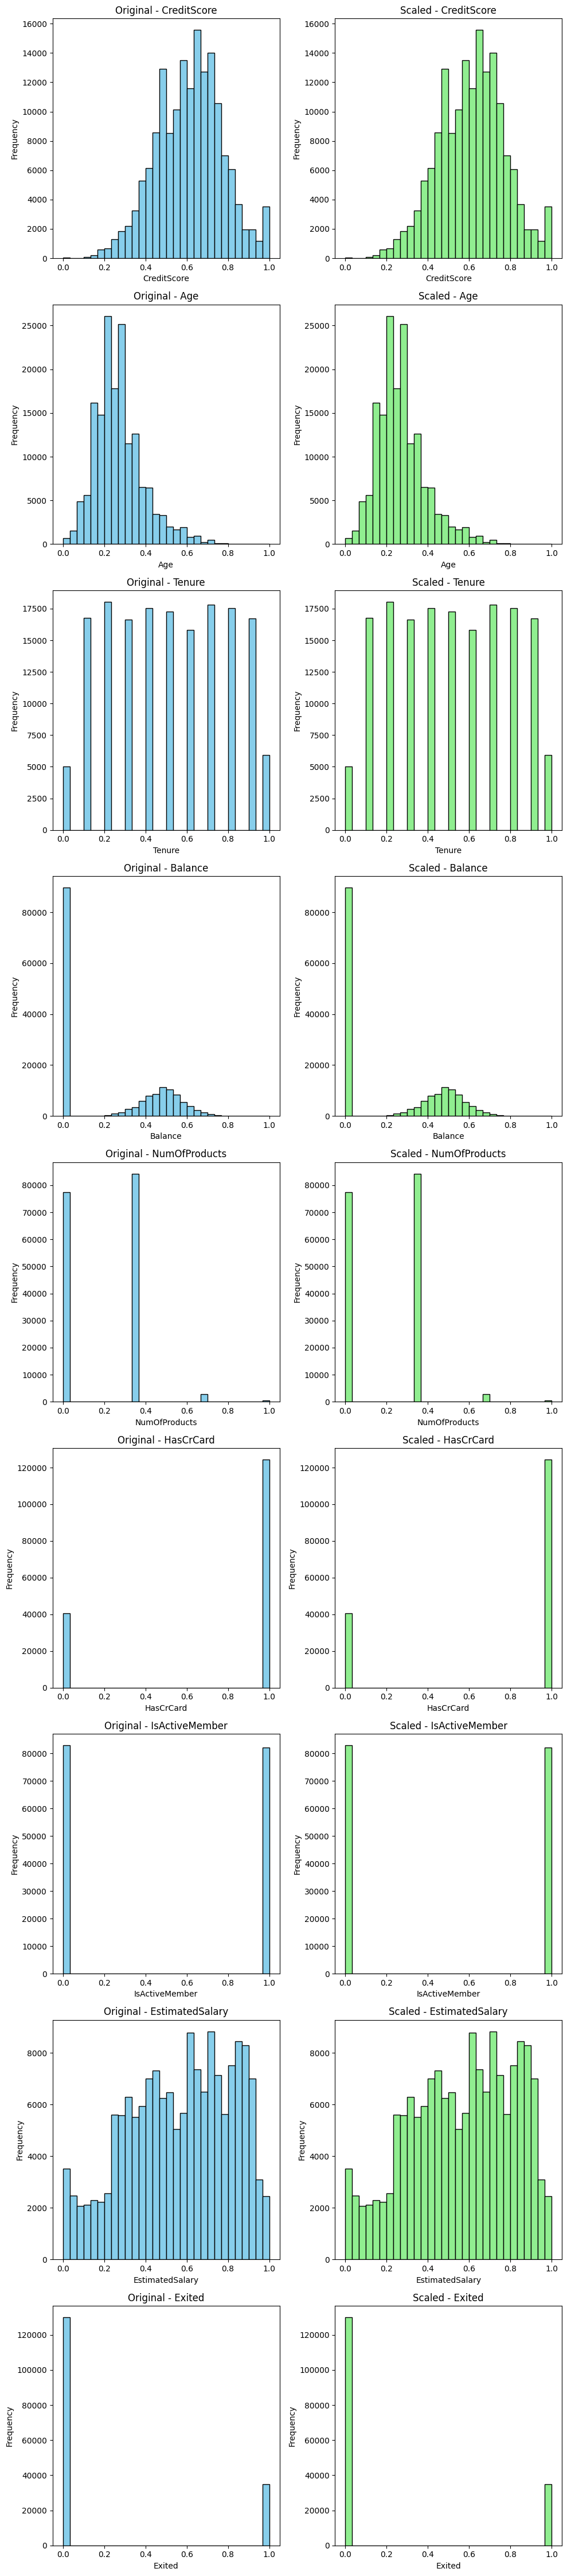

In [113]:
import matplotlib.pyplot as plt

numerical_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(10, len(numerical_columns) * 5))

for i, col in enumerate(numerical_columns):
    # Plot original (before scaling)
    axes[i, 0].hist(new_df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Original - {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    axes[i, 1].hist(scaled_df[col], bins=30, color='lightgreen', edgecolor='black')
    axes[i, 1].set_title(f'Scaled - {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [114]:
scaled_df.duplicated().sum()

np.int64(123)

In [115]:
num_rows_before = scaled_df.shape[0]

scaled_df.drop_duplicates(inplace=True)

num_rows_after = scaled_df.shape[0]

num_duplicates_removed = num_rows_before - num_rows_after

print(f"Number of duplicate rows removed: {num_duplicates_removed}")


Number of duplicate rows removed: 123


In [125]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target = ['Exited']

X = new_df[features]
y = new_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

/Users/der-bear/DATA3402/env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Test Accuracy: 0.8473339531875328
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91     38963
           1       0.70      0.49      0.58     10511

    accuracy                           0.85     49474
   macro avg       0.79      0.72      0.74     49474
weighted avg       0.84      0.85      0.84     49474



In [118]:
countries = new_df['Geography'].unique()

for country in countries:
    country_mask = (new_df.loc[X_test.index, 'Geography'] == country)
    X_country_test = X_test[country_mask]
    y_country_test = y_test[country_mask]

    if len(X_country_test) == 0:
        print(f"No samples for {country} in the test set.")
        continue
    
    y_country_pred = rf_model.predict(X_country_test)
    
    country_accuracy = accuracy_score(y_country_test, y_country_pred)
    print(f"{country} - Test Accuracy: {country_accuracy:.2f}")

    print(f"Classification Report for {country}:\n")
    print(classification_report(y_country_test, y_country_pred))
    print("-" * 50)

France - Test Accuracy: 0.87
Classification Report for France:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     23551
           1       0.62      0.49      0.55      4656

    accuracy                           0.87     28207
   macro avg       0.76      0.72      0.74     28207
weighted avg       0.86      0.87      0.86     28207

--------------------------------------------------
Spain - Test Accuracy: 0.85
Classification Report for Spain:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      9061
           1       0.61      0.49      0.54      1926

    accuracy                           0.85     10987
   macro avg       0.75      0.71      0.73     10987
weighted avg       0.84      0.85      0.85     10987

--------------------------------------------------
Germany - Test Accuracy: 0.75
Classification Report for Germany:

              precision    recall  f1-score   suppor

In [119]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.4 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = ['Exited']

X = new_df[features]
y = new_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Test Accuracy: 0.8219266685531794
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89     38963
           1       0.67      0.32      0.43     10511

    accuracy                           0.82     49474
   macro avg       0.76      0.64      0.66     49474
weighted avg       0.80      0.82      0.80     49474



/Users/der-bear/DATA3402/env/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/Users/der-bear/DATA3402/env/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Test Accuracy: 0.8500222339006347
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     38963
           1       0.78      0.41      0.54     10511

    accuracy                           0.85     49474
   macro avg       0.82      0.69      0.72     49474
weighted avg       0.84      0.85      0.83     49474



In [136]:
import pandas as pd

models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [0.847, 0.822, 0.85]

accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(accuracy_df)


                 Model  Accuracy
0        Random Forest     0.847
1  Logistic Regression     0.822
2                  SVM     0.850


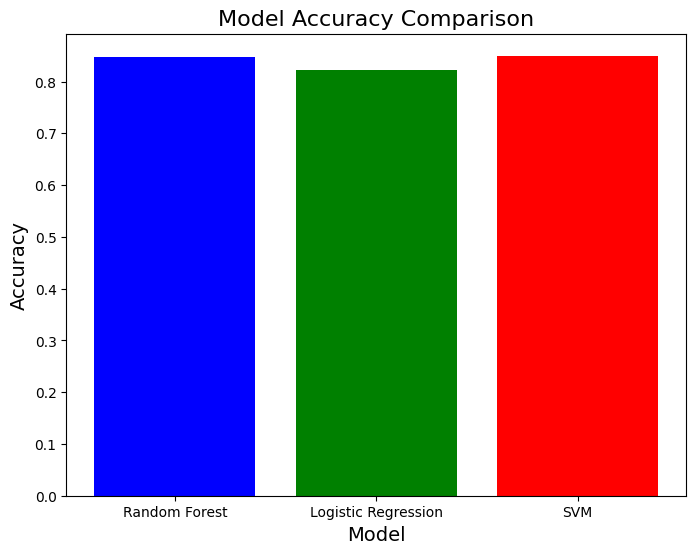

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [0.847, 0.822, 0.85] 
colors = ['blue','green','red']

plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=colors)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()


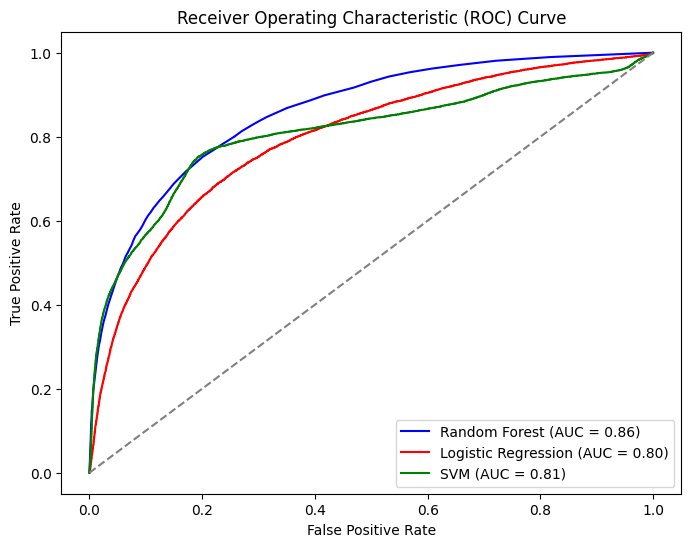

Random Forest AUC: 0.86
Logistic Regression AUC: 0.80
SVM AUC: 0.81


In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

rf_probs = rf_model.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.decision_function(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_log_reg, tpr_log_reg, color='red', label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Random Forest AUC: {roc_auc_rf:.2f}")
print(f"Logistic Regression AUC: {roc_auc_log_reg:.2f}")
print(f"SVM AUC: {roc_auc_svm:.2f}")


In [134]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

test_file_path = "/Users/der-bear/Downloads/test.csv" 
df_kaggle = pd.read_csv(test_file_path)
X_test_kaggle = df_kaggle[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

X_test_kaggle = scaler.transform(X_test_kaggle)

y_pred_test = rf_model.predict(X_test_kaggle)

submission = pd.DataFrame({
    'id': df_kaggle['id'],
    'Exited': y_pred_test
})

submission.to_csv('submission.csv', index=False)

/Users/der-bear/DATA3402/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [135]:
print(submission.head())

       id  Exited
0  165034       0
1  165035       1
2  165036       0
3  165037       0
4  165038       0
